Machine Learning project for Python Class: A neural network distinguishing cats and dogs
Creators: Michał Kloska, Jakub Zapaśnik, Daniel Lilla

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [59]:
from keras.preprocessing.image import load_img, img_to_array

In [60]:
#loading file names
import os

img_dir = r'C:\Users\Miszel\Desktop\train'
images = os.listdir(img_dir)
images[:3]

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg']

In [61]:
full_images = [os.path.join(img_dir, img) for img in images]

In [62]:
full_images[:3]

['C:\\Users\\Miszel\\Desktop\\train\\cat.0.jpg',
 'C:\\Users\\Miszel\\Desktop\\train\\cat.1.jpg',
 'C:\\Users\\Miszel\\Desktop\\train\\cat.10.jpg']

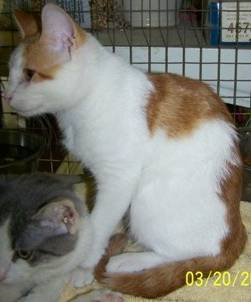

In [63]:
image_index = 6482
load_img(full_images[image_index])

In [64]:
#creating RGB layers for the model to detect colours
def show_rgb_layers(image, subplots_args=dict()):
    '''
    Show RGB layers of the image on separate axes.
    '''
    
    im_shape = image.shape
    
#     check if the loaded image has 3 dimensions
    assert image.ndim == 3
#     check whether the last dimension of im_shape has 3 dimensions
    assert im_shape[-1] == 3
    
#     plot rgb layers
    fig, ax = plt.subplots(ncols=3)
    for idx, layer in enumerate(['Reds', 'Greens', 'Blues']):
        ax[idx].imshow(image[:, :, idx], cmap=layer)
    
    return fig

In [65]:
from imports_for_ML import load_images

x, y = load_images(img_dir, n_images=10000, resize=(100, 100))

**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************


In [66]:
x.shape

(10000, 100, 100, 3)

In [67]:
from keras.models import Sequential
from keras.layers import Dense

from keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

from keras.callbacks import EarlyStopping

from keras.models import load_model

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state=42)

In [69]:
x_train.shape

(9000, 100, 100, 3)

In [70]:
x_test.shape

(1000, 100, 100, 3)

In [71]:
model = Sequential([
#first convolution layer, then max pooling
Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform'),
MaxPooling2D((3,3)),
BatchNormalization(),
Dropout(0.1),
#next convolution layer, then max pooling
Conv2D(64,(3,3), activation = 'relu', kernel_initializer='he_uniform'),
MaxPooling2D((2,2)),
BatchNormalization(),
Dropout(0.1),
#last convolution layer, then maxpooling
Conv2D(128, (3,3), activation = 'relu', kernel_initializer='he_uniform'),
MaxPooling2D((2,2)),
BatchNormalization(),
Dropout(0.1),

#flattening and adding 64 ordinary neurons
Flatten(),
Dense(128, activation = 'relu'),
Dropout(0.3),

#last binary neuron outputting 1 or 0; dog or cat
Dense(1, activation='sigmoid')

])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [72]:
stop_early = EarlyStopping(patience = 4)
history = model.fit(x_train, y_train, epochs = 30, validation_split= 0.04, callbacks=[stop_early])

Epoch 1/30
270/270 [==============================] - 26s 93ms/step - loss: 0.8231 - accuracy: 0.6584 - val_loss: 0.6026 - val_accuracy: 0.6806
Epoch 2/30
270/270 [==============================] - 24s 90ms/step - loss: 0.5054 - accuracy: 0.7616 - val_loss: 0.5196 - val_accuracy: 0.7611
Epoch 3/30
270/270 [==============================] - 25s 91ms/step - loss: 0.4289 - accuracy: 0.7997 - val_loss: 0.5328 - val_accuracy: 0.7528
Epoch 4/30
270/270 [==============================] - 25s 91ms/step - loss: 0.3736 - accuracy: 0.8292 - val_loss: 0.4884 - val_accuracy: 0.7361
Epoch 5/30
270/270 [==============================] - 24s 90ms/step - loss: 0.3205 - accuracy: 0.8589 - val_loss: 0.4934 - val_accuracy: 0.7694
Epoch 6/30
270/270 [==============================] - 24s 88ms/step - loss: 0.2719 - accuracy: 0.8846 - val_loss: 0.5468 - val_accuracy: 0.7611
Epoch 7/30
270/270 [==============================] - 24s 91ms/step - loss: 0.2444 - accuracy: 0.8932 - val_loss: 0.5125 - val_accuracy:

In [73]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 15, 15, 64)      

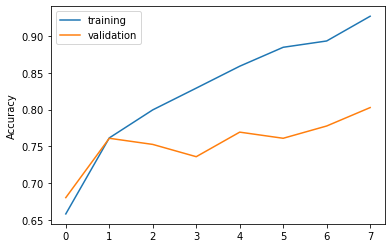

In [74]:
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.ylabel('Accuracy')
plt.legend()

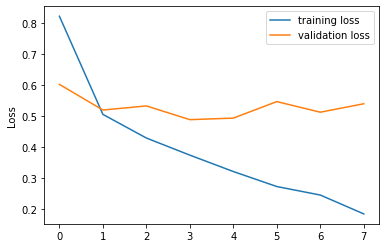

In [75]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.ylabel('Loss')
plt.legend()

In [76]:
train_corr = model.fit(x_train, y_train)

test_corr = model.fit(x_test, y_test)

32/32 [==============================] - 3s 101ms/step - loss: 0.5298 - accuracy: 0.7900


Accuracy on the training data:
282/282 [==============================] - 7s 26ms/step - loss: 0.2212 - accuracy: 0.9238
0.9237777590751648

Accuracy on the test data:
32/32 [==============================] - 1s 25ms/step - loss: 0.2342 - accuracy: 0.9190
0.9190000295639038


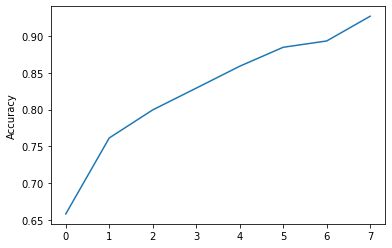

In [77]:
plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')

print('Accuracy on the training data:')
print(model.evaluate(x_train, y_train)[1])

print('\nAccuracy on the test data:')
print(model.evaluate(x_test, y_test)[1])